<a href="https://colab.research.google.com/github/LorenaFMarani/ATV1-DataMining/blob/main/Atividade1_LorenaFMarani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
install.packages("tidymodels")
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘lava’, ‘prodlim’, ‘future’, ‘ipred’, ‘furrr’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library("tidyverse")
library("tidymodels")
library("dplyr")
library("rpart")
library("skimr")

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.1
✔ infer        1.0.3     ✔ workflows    1.1.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.2     ✔ yardstick    1.1.0
✔ recipes      1.0.2     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org


Attaching package: ‘rpart’


The following object is masked from ‘package:dials’:

    prune




In [8]:
dados <- read_csv2("dados.csv")

#excluindo linhas com valores inexistentes
na.omit(dados)

#excluindo colunas irrelevantes para este contexto
dados<-dados[,-c(12:23)]

#transformando o campo ano em date
dados$aeronave_ano_fabricacao <- as.Date(dados$aeronave_ano_fabricacao, "%Y")

skim(dados)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 6191 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (19): aeronave_tipo_veiculo, aeronave_pais_fabricante, aeronave_fabrican...
dbl  (4): aeronave_fatalidades_total, ocorrencia, aeronave_pmd, aeronave_pmd...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


aeronave_tipo_veiculo,aeronave_pais_fabricante,aeronave_fabricante,aeronave_modelo,aeronave_ano_fabricacao,aeronave_assentos,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_fase_operacao,aeronave_nivel_dano,⋯,aeronave_operador_categoria,aeronave_tipo_icao,aeronave_pmd,aeronave_pmd_categoria,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_tipo_operacao
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AVIÃO,BRASIL,EMBRAER,EMB-820C NAVAJO,1976,10,PISTÃO,BIMOTOR,POUSO,SUBSTANCIAL,⋯,***,PA31,3175,3175,BRASIL,AVIÃO,TÁXI AÉREO,DEPUTADO LUÍS EDUARDO MAGALHÃES,FAZENDA PONTAL,TÁXI AÉREO
HELICÓPTERO,BRASIL,ROBINSON HELICOPTER,R22 BETA,1991,2,PISTÃO,MONOMOTOR,MANOBRA,SUBSTANCIAL,⋯,***,R22,621,621,BRASIL,HELICÓPTERO,INSTRUÇÃO,FORA DE AERODROMO,FORA DE AERODROMO,INSTRUÇÃO
AVIÃO,BRASIL,AIR TRACTOR,AT-401B,1994,1,PISTÃO,MONOMOTOR,ESPECIALIZADA,LEVE,⋯,ESPECIALIZADA,AT3P,2722,2722,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA
AVIÃO,BRASIL,BOEING COMPANY,737-8EH,2009,197,JATO,BIMOTOR,DESCIDA,NENHUM,⋯,REGULAR,B738,70533,70533,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR
AVIÃO,BRASIL,EMBRAER,EMB-145LR,2001,54,JATO,BIMOTOR,CORRIDA APÓS POUSO,NENHUM,⋯,***,E145,21990,21990,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR
AVIÃO,BRASIL,AEROSPATIALE AND ALENIA,ATR-42-320,1993,50,TURBOÉLICE,BIMOTOR,DECOLAGEM,LEVE,⋯,REGULAR,AT43,16700,16700,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,REGULAR
AVIÃO,ESTADOS UNIDOS,MCDONNELL DOUGLAS,DC-10-30F,1980,0,PISTÃO,TRIMOTOR,CORRIDA APÓS POUSO,LEVE,⋯,***,DC10,256280,256280,ESTADOS UNIDOS,AVIÃO,***,FORA DE AERODROMO,FORA DE AERODROMO,***
AVIÃO,BRASIL,BEECH AIRCRAFT,B300,0,11,TURBOÉLICE,BIMOTOR,TÁXI,NENHUM,⋯,PARTICULAR,B350,6804,6804,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PRIVADA
AVIÃO,BRASIL,AERO BOERO,AB-115,1993,3,PISTÃO,MONOMOTOR,CORRIDA APÓS POUSO,LEVE,⋯,INSTRUÇÃO,AB11,770,770,BRASIL,AVIÃO,INSTRUÇÃO,FORA DE AERODROMO,FORA DE AERODROMO,INSTRUÇÃO


── Data Summary ────────────────────────
                           Values
Name                       dados 
Number of rows             6191  
Number of columns          11    
_______________________          
Column type frequency:           
  character                9     
  Date                     1     
  numeric                  1     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable             n_missing complete_rate min max empty n_unique
1 aeronave_tipo_veiculo             0         1       3  11     0       10
2 aeronave_pais_fabricante          0         1       5  16     0       24
3 aeronave_fabricante               0         1       2  47     0      257
4 aeronave_modelo                   0         1       2  29     0      805
5 aeronave_assentos                 0         1       1   4     0       94
6 aeronave_motor_tipo              14         0.998  

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 3 > 1' in coercion to 'logical(1)'”


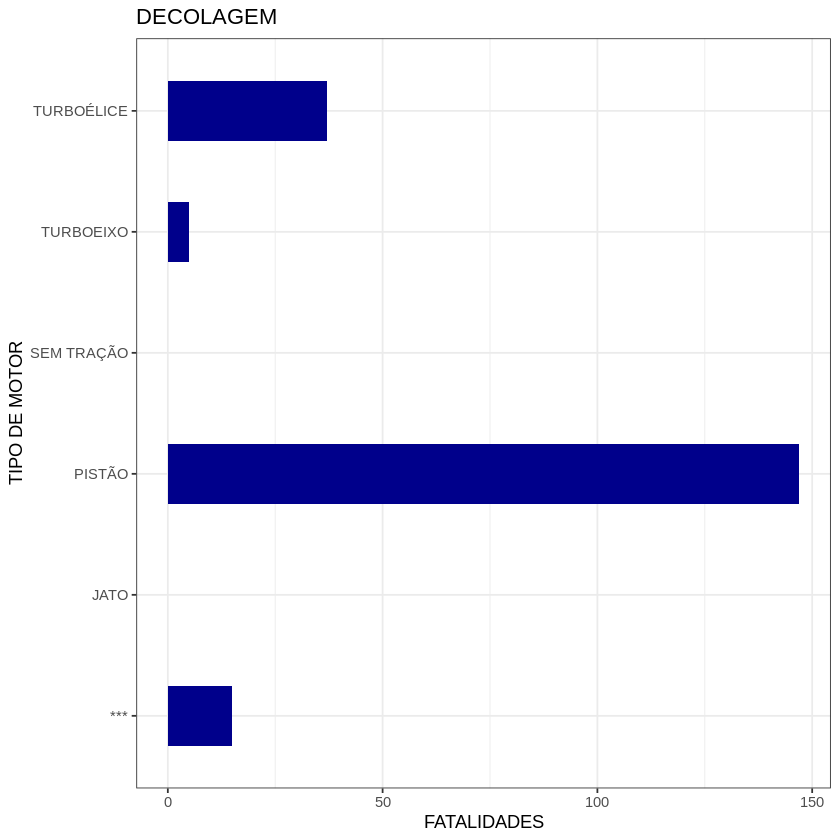

In [10]:
dados %>% 
filter(aeronave_fase_operacao == "DECOLAGEM")|>
filter(is.na(aeronave_motor_tipo) == FALSE) |>
filter(is.na(aeronave_fase_operacao) == FALSE)%>% 
ggplot(aes(x = aeronave_motor_tipo, y = aeronave_fatalidades_total),
show.legend = FALSE) +
geom_col(fill = "darkblue", width = 0.5) +
xlab("TIPO DE MOTOR") +
ylab("FATALIDADES") +
ggtitle("DECOLAGEM") +
theme_bw() +
coord_flip()

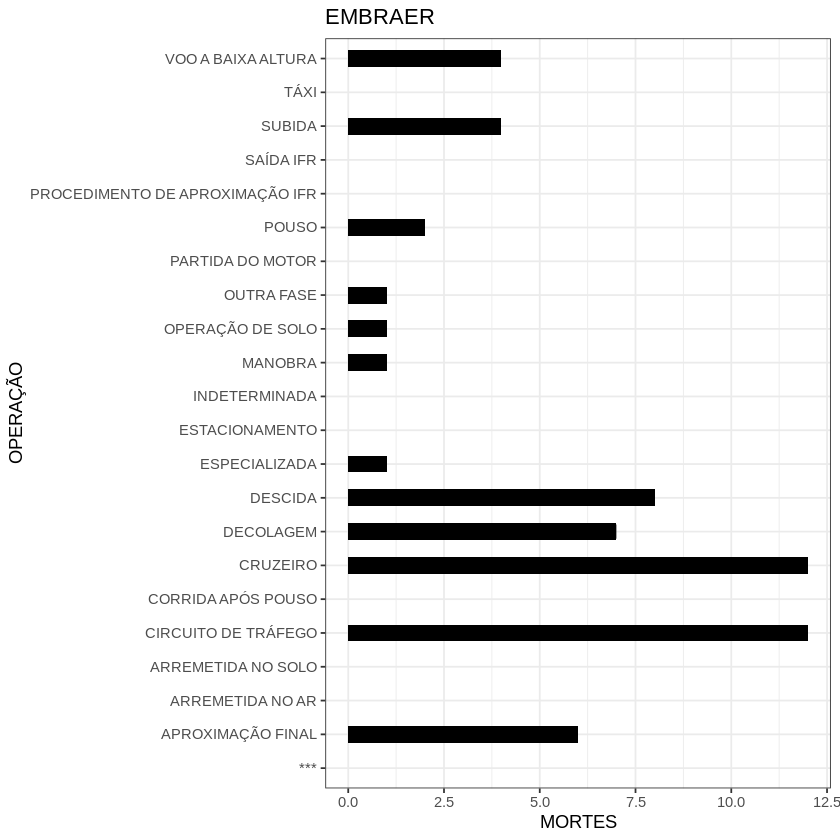

In [11]:
dados %>% 
filter(aeronave_fabricante == "EMBRAER") %>% 
ggplot(aes(x = aeronave_fatalidades_total, y = aeronave_fase_operacao))+
geom_line(size=4)+
theme_bw() +
geom_col(fill = "black", width = 0.5) +
ggtitle("EMBRAER") +
ylab("OPERAÇÃO") +
xlab("MORTES")

In [12]:
glimpse(dados)
table(dados$aeronave_fatalidades_total)   #número de mortes (coluna de cima) por ocorrências


Rows: 6,191
Columns: 11
$ aeronave_tipo_veiculo      <chr> "AVIÃO", "HELICÓPTERO", "AVIÃO", "AVIÃO", "…
$ aeronave_pais_fabricante   <chr> "BRASIL", "BRASIL", "BRASIL", "BRASIL", "BR…
$ aeronave_fabricante        <chr> "EMBRAER", "ROBINSON HELICOPTER", "AIR TRAC…
$ aeronave_modelo            <chr> "EMB-820C NAVAJO", "R22 BETA", "AT-401B", "…
$ aeronave_ano_fabricacao    <date> 1976-10-27, 1991-10-27, 1994-10-27, 2009-1…
$ aeronave_assentos          <chr> "10", "2", "1", "197", "54", "50", "0", "11…
$ aeronave_motor_tipo        <chr> "PISTÃO", "PISTÃO", "PISTÃO", "JATO", "JATO…
$ aeronave_motor_quantidade  <chr> "BIMOTOR", "MONOMOTOR", "MONOMOTOR", "BIMOT…
$ aeronave_fase_operacao     <chr> "POUSO", "MANOBRA", "ESPECIALIZADA", "DESCI…
$ aeronave_nivel_dano        <chr> "SUBSTANCIAL", "SUBSTANCIAL", "LEVE", "NENH…
$ aeronave_fatalidades_total <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…



   0    1    2    3    4    5    6    7    8   10   16 
5733  239  120   34   30   19    6    5    3    1    1 

In [13]:
#Total de óbitos
total <-sum(dados$aeronave_fatalidades_total)
total

[1] 917

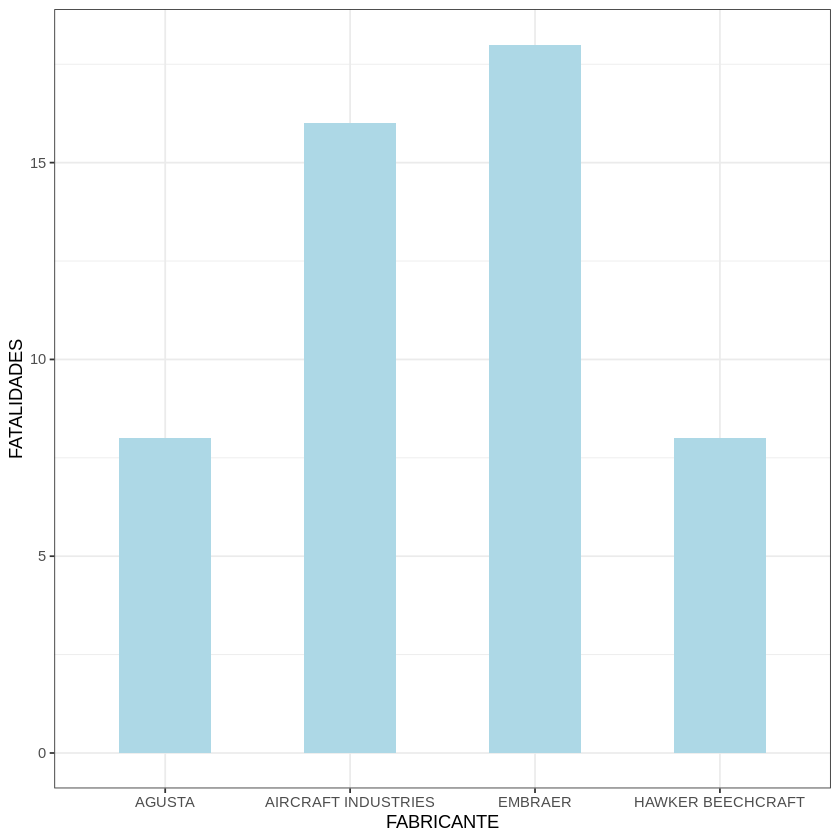

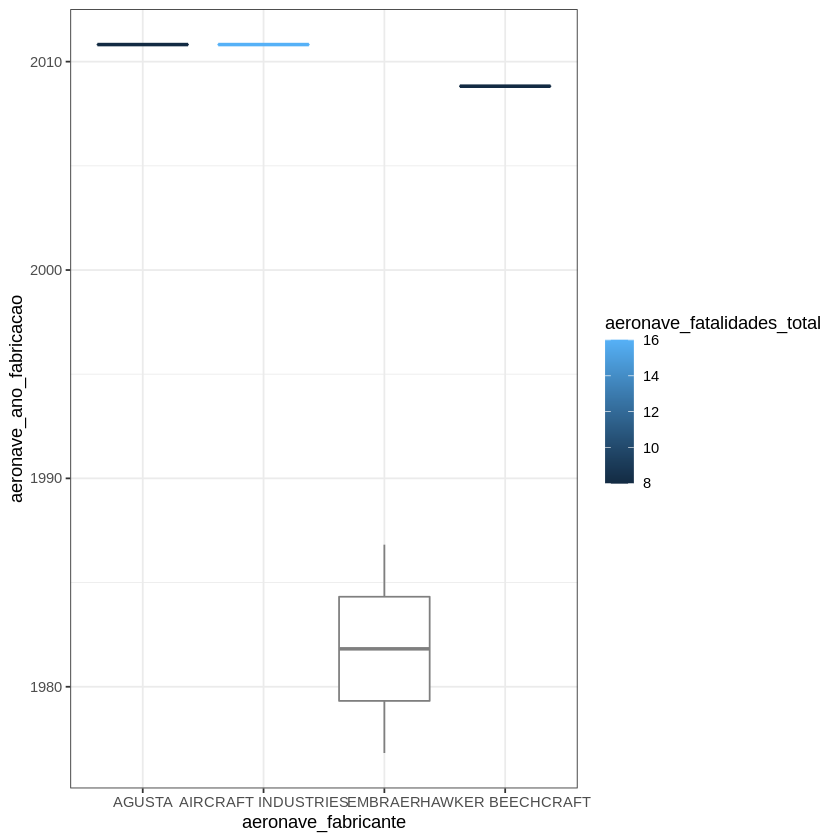

In [14]:
#Ranking de óbitos por fabricante

fatal_fabri <- dados[order(dados$aeronave_fatalidades_total, decreasing=TRUE), ][5:1, ]

fatal_fabri %>%
ggplot(aes(x = aeronave_fabricante, y = aeronave_fatalidades_total),
show.legend = FALSE) +
geom_col(fill = "lightblue", width = 0.5) +
xlab("FABRICANTE") +
ylab("FATALIDADES") +
theme_bw()

fatal_fabri %>% 
  ggplot(aes(x = aeronave_ano_fabricacao,  
             y = aeronave_fabricante)) +
             theme_bw() +
             coord_flip()+
  geom_boxplot(aes(color = aeronave_fatalidades_total))


In [15]:
#Total de óbitos por tipo de motor da aeronave
fatal_motor <- group_by(dados,aeronave_motor_tipo)%>%summarise(Total=sum(aeronave_fatalidades_total))

table(fatal_motor)

                   Total
aeronave_motor_tipo 0 4 21 47 106 107 632
         ***        0 0  0  1   0   0   0
         JATO       0 0  1  0   0   0   0
         PISTÃO     0 0  0  0   0   0   1
         SEM TRAÇÃO 0 1  0  0   0   0   0
         TURBOEIXO  0 0  0  0   0   1   0
         TURBOÉLICE 0 0  0  0   1   0   0

In [16]:
#Total de Acidentes Fatais por fase da operação
table(dados[,9])

aeronave_fase_operacao
                            ***               APROXIMAÇÃO FINAL 
                             29                             346 
               ARREMETIDA NO AR              ARREMETIDA NO SOLO 
                             31                              50 
       CHEQUE DE MOTOR OU ROTOR             CIRCUITO DE TRÁFEGO 
                              6                             133 
             CORRIDA APÓS POUSO                        CRUZEIRO 
                            672                             943 
                      DECOLAGEM              DECOLAGEM VERTICAL 
                            993                              14 
                        DESCIDA           DESCIDA DE EMERGÊNCIA 
                            166                               3 
          DESCIDA DESCONTROLADA                 EMPREGO MILITAR 
                              3                               1 
                  ESPECIALIZADA                          ESPERA 
  

In [17]:
#A base de dados exibe a quantidade de vítimas e, para a classificação, a variável y deverá ser binária
dados$aeronave_fatalidades_total[dados$aeronave_fatalidades_total>=1]<-"TRUE"
dados$aeronave_fatalidades_total[dados$aeronave_fatalidades_total==0]<-"FALSE"

#As variáveis independentes devem ser fatores, que denotam níveis para classificação
dados<-mutate(dados,across("aeronave_tipo_veiculo":"aeronave_modelo",as_factor))
dados<-mutate(dados,across("aeronave_motor_tipo":"aeronave_nivel_dano",as_factor))
dados<-mutate(dados,across("aeronave_ano_fabricacao":"aeronave_assentos",as.numeric))
dados$aeronave_fatalidades_total<-as_factor(dados$aeronave_fatalidades_total)
glimpse(dados)


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


Rows: 6,191
Columns: 11
$ aeronave_tipo_veiculo      <fct> AVIÃO, HELICÓPTERO, AVIÃO, AVIÃO, AVIÃO, AV…
$ aeronave_pais_fabricante   <fct> BRASIL, BRASIL, BRASIL, BRASIL, BRASIL, BRA…
$ aeronave_fabricante        <fct> EMBRAER, ROBINSON HELICOPTER, AIR TRACTOR, …
$ aeronave_modelo            <fct> EMB-820C NAVAJO, R22 BETA, AT-401B, 737-8EH…
$ aeronave_ano_fabricacao    <dbl> 2491, 7969, 9065, 14544, 11622, 8700, 3952,…
$ aeronave_assentos          <dbl> 10, 2, 1, 197, 54, 50, 0, 11, 3, 2, 6, 184,…
$ aeronave_motor_tipo        <fct> PISTÃO, PISTÃO, PISTÃO, JATO, JATO, TURBOÉL…
$ aeronave_motor_quantidade  <fct> BIMOTOR, MONOMOTOR, MONOMOTOR, BIMOTOR, BIM…
$ aeronave_fase_operacao     <fct> POUSO, MANOBRA, ESPECIALIZADA, DESCIDA, COR…
$ aeronave_nivel_dano        <fct> SUBSTANCIAL, SUBSTANCIAL, LEVE, NENHUM, NEN…
$ aeronave_fatalidades_total <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…


In [18]:
data_split<- initial_split(dados,prop = 0.8)
dados_treino <- training(data_split)

table(dados$aeronave_fatalidades_total)
table(dados_treino$aeronave_fatalidades_total)

#conferindo a proporção de 80% para analisar se o split está balanceado

#original -> 0.07397836
458/(5733+458)

#dados splitados -> 0.07512116
369/(4583+369)

#valores similares, ok


FALSE  TRUE 
 5733   458 


FALSE  TRUE 
 4587   365 

[1] 0.07397836

[1] 0.07451535

In [19]:
#Aplicando o modelo na base de dados escolhida - Treino
#montando a receita
receita<- recipe(aeronave_fatalidades_total ~ ., data = dados_treino)

#escolhendo a arquitetura e a engine
modelo<- decision_tree() |>
     set_engine("rpart") |> 
     set_mode("classification")
       
#definindo o fluxo de processamento
fluxo <- workflow(receita,modelo)

#executando o modelo em treino
fit_modelo_treino <- fit(fluxo,dados_treino)

fit_modelo_treino

#Preprocessor: Recipe
#Model: decision_tree()

#*******************************************RESULTADOS TREINO**************
#Registros de treino:4952
#Erros:383 - ou seja, 383 ocorrências terminaram em acidentes fatais
#Valor predominante(predição) = False, ou seja, sem fatalidade
#Probabilidade de classificar corretamente: 92%
#Probabilidade de classificar incorretamente: 0.07%
#STUMP - O REGRAS 1 DIVISÃO (NÓ)
#**************************************************************************


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: decision_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
n= 4952 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 4952 365 FALSE (0.92629241 0.07370759)  
   2) aeronave_nivel_dano=SUBSTANCIAL,LEVE,NENHUM,*** 4672 157 FALSE (0.96639555 0.03360445)  
     4) aeronave_modelo=EMB-820C NAVAJO,R22 BETA,AT-401B,737-8EH,EMB-145LR,ATR-42-320,B300,AB-115,A-122-B,EMB-810C,A320-214,EMB-712,S-76A,AW139,A188B,PA-25-260,208B,EMB-202,EMB-201,200,EMB-721D,ATR-72-202,58,182P,ATR-42-300,390,AS 350 B3,A36,ATR-42-500,PA-25-235,150M,A310-304,PA-28R-200,SR22,727-264,P206A,170A,ERJ 190-200 IGW,ERJ 190-100 IGW,A320-232,C90,31A,FOX II,PA-34-200,CAP-4,F28MK0100,A321-231,PA-31T1,PA-32R-301T,56-C,R44 II,152,56-C-1,R-12,S-76C,737-36N,EMB-202A

In [20]:
#Aplicando o modelo na base de dados escolhida - Teste - e Analisando o resultado

dados_teste <-testing(data_split)

glimpse(dados_teste)
result_teste <- predict(fit_modelo_treino, dados_teste)
result_teste <-mutate(result_teste, aeronave_fatalidades_total = dados_teste$aeronave_fatalidades_total)
result_teste |> metrics(aeronave_fatalidades_total, .pred_class)  #96% de acurácia

Rows: 1,239
Columns: 11
$ aeronave_tipo_veiculo      <fct> AVIÃO, AVIÃO, AVIÃO, AVIÃO, AVIÃO, AVIÃO, A…
$ aeronave_pais_fabricante   <fct> BRASIL, BRASIL, ESTADOS UNIDOS, BRASIL, BRA…
$ aeronave_fabricante        <fct> AIR TRACTOR, BOEING COMPANY, MCDONNELL DOUG…
$ aeronave_modelo            <fct> AT-401B, 737-8EH, DC-10-30F, PA-25-260, EMB…
$ aeronave_ano_fabricacao    <dbl> 9065, 14544, 3952, 299, 12718, 3221, 14179,…
$ aeronave_assentos          <dbl> 1, 197, 0, 1, 1, 6, 8, 6, 2, 52, 4, 4, 166,…
$ aeronave_motor_tipo        <fct> PISTÃO, JATO, PISTÃO, PISTÃO, PISTÃO, PISTÃ…
$ aeronave_motor_quantidade  <fct> MONOMOTOR, BIMOTOR, TRIMOTOR, MONOMOTOR, MO…
$ aeronave_fase_operacao     <fct> ESPECIALIZADA, DESCIDA, CORRIDA APÓS POUSO,…
$ aeronave_nivel_dano        <fct> LEVE, NENHUM, LEVE, SUBSTANCIAL, SUBSTANCIA…
$ aeronave_fatalidades_total <fct> FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FA…


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9523810
kap,binary,0.6215305


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



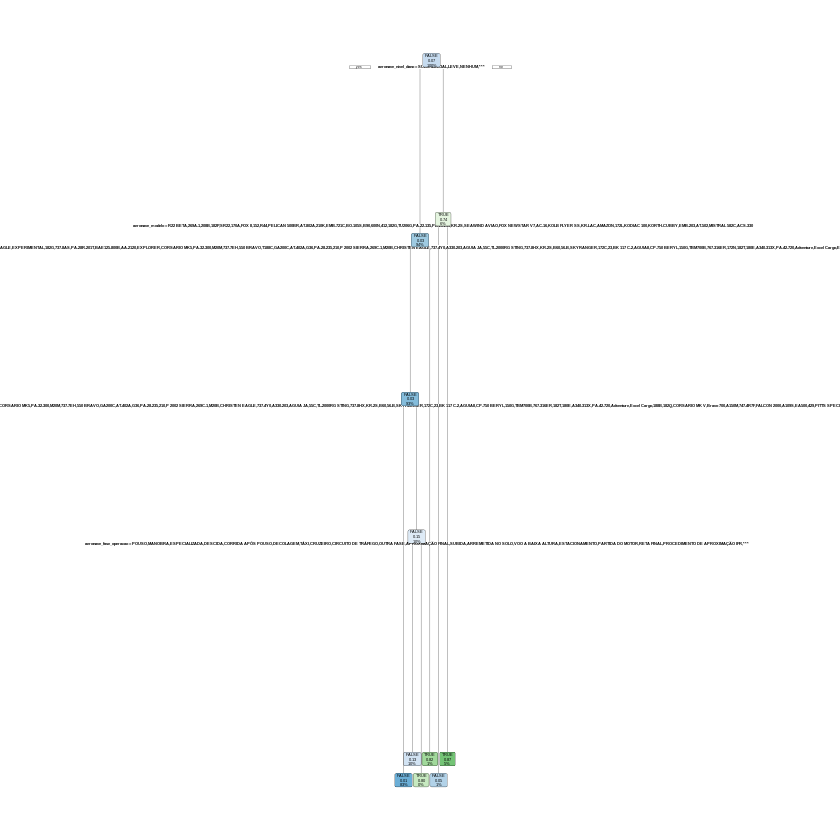

In [21]:
install.packages("rpart.plot")
library(rpart.plot)

#fit rpart model (i.e. decision tree)
r = rpart(aeronave_fatalidades_total ~., data=dados_treino)
#plot model
rpart.plot(r)



In [28]:
#Aplicando o modelo em base de teste setando hiperparâmetros
modelo_hiperp<- decision_tree( 
     cost_complexity = 2, #modelo mais simples possÍvel, seguindo a Navalha de Ockam
     tree_depth = 3, #distancia máxima do topo aos nós finais
     min_n = 20)|> #minimo de exemploares em um nó para efetuar a dividir
     set_engine("rpart") |> 
     set_mode("classification")


#Adaptando o fluxo
fluxo <- workflow(receita,modelo_hiperp)

#Aplicando o modelo
fit_modelo_hiperp <- fit(fluxo,dados_teste)
dados_teste_hiperp <-testing(data_split)

#obtendo resultados
result_teste_hiperp <- predict(fit_modelo_hiperp, dados_teste)
result_teste_hiperp <-mutate(result_teste_hiperp, aeronave_fatalidades_total = dados_teste$aeronave_fatalidades_total)
result_teste_hiperp |> metrics(aeronave_fatalidades_total, .pred_class)  #94% de acurácia



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9249395
kap,binary,0.0000000


In [29]:

crossval <- vfold_cv(dados_treino, v = 5) #5 é a divisão de subgrupos amostrais. Quanto maior o número de folds, mais dados para treino e menos para teste, a custo de alta demanda de recursos computacionais. Neste caso, 4 partes da subamostra serão para treino e 1 para validação. Por meio deste procedimento, é possível efetuar cálculos como média e desvio padrão, facilitando a análise de qualidade do modelo Qnesta configuração de hiperparâmetros.O melhor resultado entre os hiperparâmetros dos subgrupos será adotado para testa da base toda.


ajuste_rpart  <- fit_resamples(modelo_hiperp, receita, resamples = crossval)
ajuste_rpart |> collect_metrics()


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.926294,5,0.00222181,Preprocessor1_Model1
roc_auc,binary,0.500000,5,0.00000000,Preprocessor1_Model1


In [31]:

crossval <- vfold_cv(dados_treino, v = 5) #5 é a divisão de subgrupos amostrais. Quanto maior o número de folds, mais dados para treino e menos para teste, a custo de alta demanda de recursos computacionais. Neste caso, 4 partes da subamostra serão para treino e 1 para validação. Por meio deste procedimento, é possível efetuar cálculos como média e desvio padrão, facilitando a análise de qualidade do modelo Qnesta configuração de hiperparâmetros.O melhor resultado entre os hiperparâmetros dos subgrupos será adotado para testa da base toda.


ajuste_rpart  <- fit_resamples(modelo_hiperp, receita, resamples = crossval)
ajuste_rpart |> collect_metrics()


#*****RESULTADOS TESTE COM HIPERPARÂMETROS E CROSSVALIDATION**************

#accuracy	0.92
#kap	0.50

#*************************************************************************



.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.9262938,5,0.003758589,Preprocessor1_Model1
roc_auc,binary,0.5000000,5,0.000000000,Preprocessor1_Model1


In [32]:
fit_modelo <- decision_tree(mode = "classification", 
                           engine = "rpart",
                           cost_complexity = tune(), #hiperparametros, mínimo. Só será aplicado se servir para mitigar o risco de erros e reduzir o tamanho da árvore.
                           min_n = tune()) #número mínimo de exemplos para definir uma classificação

grade_parametros <- grid_regular(cost_complexity(), min_n())

#Aplicação do modelo na base de teste com cross validation base de treino
wf <- workflow() |> add_model(fit_modelo) |> add_formula(aeronave_fatalidades_total ~ . )
crossval <- vfold_cv(dados_treino, v = 5)
grade_ajustada <- tune_grid(wf, resamples = crossval, grid = grade_parametros)

# Tuning results
# 5-fold cross-validation 

melhor_wf <- select_best(grade_ajustada, metric = "accuracy")
melhor_wf <- wf |> finalize_workflow(melhor_wf)

# 
# #══ Workflow ═══════════════════════════════════════════════════════════════════════════════════════
# Preprocessor: Formula
# Model: decision_tree()
# 
# ── Preprocessor ───────────────────────────────────────────────────────────────────────────────────
# aeronave_fatalidades_total ~ .
# 
# ── Model ──────────────────────────────────────────────────────────────────────────────────────────
# Decision Tree Model Specification (classification)
# 
# Main Arguments:
#   cost_complexity = 0.1
#   min_n = 2
# 
# Computational engine: rpart 

ajuste_final <- melhor_wf |> last_fit(data_split)
ajuste_final |> collect_metrics()



#***********************RESULTADOS TESTE COM O MELHOR WORKFLOW PELO TUNE**************

# accuracy 0.9515738
# roc_auc 0.7559330

#*************************************************************************


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.9580307,Preprocessor1_Model1
roc_auc,binary,0.8108615,Preprocessor1_Model1
